In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Import Data

In [21]:
df = pd.read_csv('01 Result Data Cleaning Part 1.csv')

numeric_columns = [col for col in df.columns if '(air)' in col]
categorical_columns = [col for col in df.columns if '(cuaca)' in col]

In [22]:
df.head()

,Tanggal,ID_Raw,ID_Cleaned,Pukul,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca),...,Pluit (air),Pluit (cuaca),Pasar Ikan (air),Pasar Ikan (cuaca),Cipinang (air),Cipinang (cuaca),Sunter (air),Sunter (cuaca),Pulo Gadung (air),Pulo Gadung (cuaca)
0,16/10/2021,194.0,140,00:00,10.0,Mendung,80.0,Terang,555.0,Terang,...,-190.0,Terang,-190.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
1,16/10/2021,193.0,141,01:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2,16/10/2021,192.0,142,02:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
3,16/10/2021,191.0,143,03:00,10.0,Mendung Tipis,90.0,Terang,555.0,Terang,...,-190.0,Terang,140.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
4,16/10/2021,190.0,144,04:00,10.0,Mendung Tipis,90.0,Terang,560.0,Terang,...,-190.0,Terang,146.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang


## Data Cleaning

In [23]:
df.isna().sum()

Tanggal                  0
ID_Raw                  28
ID_Cleaned               0
Pukul                    0
Katulampa (air)         34
Katulampa (cuaca)       41
Depok (air)             30
Depok (cuaca)           40
Manggarai (air)         31
Manggarai (cuaca)       39
Karet (air)             30
Karet (cuaca)           42
Krukut (air)            30
Krukut (cuaca)          39
Pesanggrahan (air)      30
Pesanggrahan (cuaca)    36
Angke (air)             30
Angke (cuaca)           40
Pluit (air)             32
Pluit (cuaca)           45
Pasar Ikan (air)        30
Pasar Ikan (cuaca)      45
Cipinang (air)          32
Cipinang (cuaca)        43
Sunter (air)            31
Sunter (cuaca)          42
Pulo Gadung (air)       35
Pulo Gadung (cuaca)     58
dtype: int64

## Impute Missing Data

In [24]:
df_imputed = df.copy()

In [25]:
for col in numeric_columns:
    # Get the mask of missing values
    missing_mask = df_imputed[col].isna()
    
    # Skip if no missing values
    if not missing_mask.any():
        continue
        
    # Simple imputation with before-after average
    df_imputed[col] = df_imputed[col].fillna(
        (df_imputed[col].shift(1) + df_imputed[col].shift(-1)) / 2
    )

# For categorical columns - use forward fill
categorical_columns = [col for col in df.columns if '(cuaca)' in col]
for col in categorical_columns:
    df_imputed[col] = df_imputed[col].ffill()

In [26]:
df_imputed.isna().sum()

Tanggal                  0
ID_Raw                  28
ID_Cleaned               0
Pukul                    0
Katulampa (air)          0
Katulampa (cuaca)        0
Depok (air)              0
Depok (cuaca)            0
Manggarai (air)          0
Manggarai (cuaca)        0
Karet (air)              0
Karet (cuaca)            0
Krukut (air)             0
Krukut (cuaca)           0
Pesanggrahan (air)       0
Pesanggrahan (cuaca)     0
Angke (air)              0
Angke (cuaca)            0
Pluit (air)              0
Pluit (cuaca)            0
Pasar Ikan (air)         0
Pasar Ikan (cuaca)       0
Cipinang (air)           0
Cipinang (cuaca)         0
Sunter (air)             0
Sunter (cuaca)           0
Pulo Gadung (air)        0
Pulo Gadung (cuaca)      0
dtype: int64

## Convert 'Tanggal' to Datetime

In [27]:
df_cleaned = df_imputed.copy()
df_cleaned['Tanggal'] = pd.to_datetime(df_cleaned['Tanggal']+" "+ df_cleaned['Pukul'], dayfirst=True)
df_cleaned.drop('Pukul', axis=1, inplace=True)
df_cleaned.set_index('Tanggal', inplace=True)
df_cleaned.head()

,ID_Raw,ID_Cleaned,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca),Karet (air),Karet (cuaca),...,Pluit (air),Pluit (cuaca),Pasar Ikan (air),Pasar Ikan (cuaca),Cipinang (air),Cipinang (cuaca),Sunter (air),Sunter (cuaca),Pulo Gadung (air),Pulo Gadung (cuaca)
Tanggal,,,,,,,,,,,,,,,,,,,,,
2021-10-16 00:00:00,194.0,140,10.0,Mendung,80.0,Terang,555.0,Terang,25.0,Terang,...,-190.0,Terang,-190.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 01:00:00,193.0,141,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,250.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 02:00:00,192.0,142,10.0,Mendung Tipis,95.0,Terang,555.0,Terang,250.0,Terang,...,-190.0,Terang,155.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 03:00:00,191.0,143,10.0,Mendung Tipis,90.0,Terang,555.0,Terang,250.0,Terang,...,-190.0,Terang,140.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang
2021-10-16 04:00:00,190.0,144,10.0,Mendung Tipis,90.0,Terang,560.0,Terang,250.0,Terang,...,-190.0,Terang,146.0,Terang,90.0,Terang,80.0,Terang,330.0,Terang


## Only take Katulampa, Depok, and Manggarai

In [28]:
df_final = df_cleaned[['Katulampa (air)', 'Katulampa (cuaca)', 'Depok (air)', 'Depok (cuaca)', 'Manggarai (air)', 'Manggarai (cuaca)']]
df_final.head()

,Katulampa (air),Katulampa (cuaca),Depok (air),Depok (cuaca),Manggarai (air),Manggarai (cuaca)
Tanggal,,,,,,
2021-10-16 00:00:00,10.0,Mendung,80.0,Terang,555.0,Terang
2021-10-16 01:00:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang
2021-10-16 02:00:00,10.0,Mendung Tipis,95.0,Terang,555.0,Terang
2021-10-16 03:00:00,10.0,Mendung Tipis,90.0,Terang,555.0,Terang
2021-10-16 04:00:00,10.0,Mendung Tipis,90.0,Terang,560.0,Terang


In [29]:
del df, df_imputed, df_cleaned, numeric_columns, categorical_columns

# Exploratory Data Analysis

## Correlation Between Pintu Air

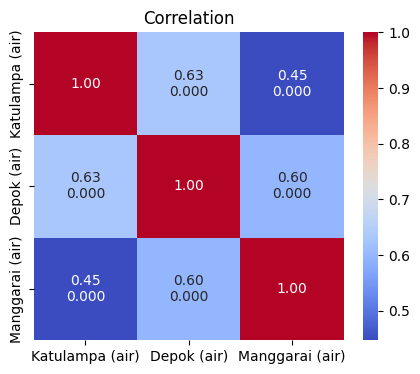

In [37]:
numeric_columns = [col for col in df_final.columns if '(air)' in col]

corr = df_final[numeric_columns].corr()

# Calculate p-values and create simple annotations
annot = np.empty_like(corr, dtype=object)
for i in range(len(numeric_columns)):
    for j in range(len(numeric_columns)):
        r = corr.iloc[i,j]
        
        # Display correlation value with 2 decimal places
        if i == j:
            annot[i,j] = f'{r:.2f}'
        else:
            p = pearsonr(df_final[numeric_columns[i]], 
                            df_final[numeric_columns[j]])

            # Show correlation on top line, p-value on bottom line
            annot[i,j] = f'{r:.2f}\n{p.pvalue:.3f}'

# Clean the column labels
clean_labels = [col.replace(' (air)', '') for col in numeric_columns]

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=annot, fmt='', cmap='coolwarm')
plt.title('Correlation')
plt.show()

## Time Series Plot

In [41]:
def ts_plot(data, col):
    plt.figure(figsize=(20, 6))
    plt.plot(data.index, data[col])
    plt.title(col)
    plt.xlabel('Tanggal')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

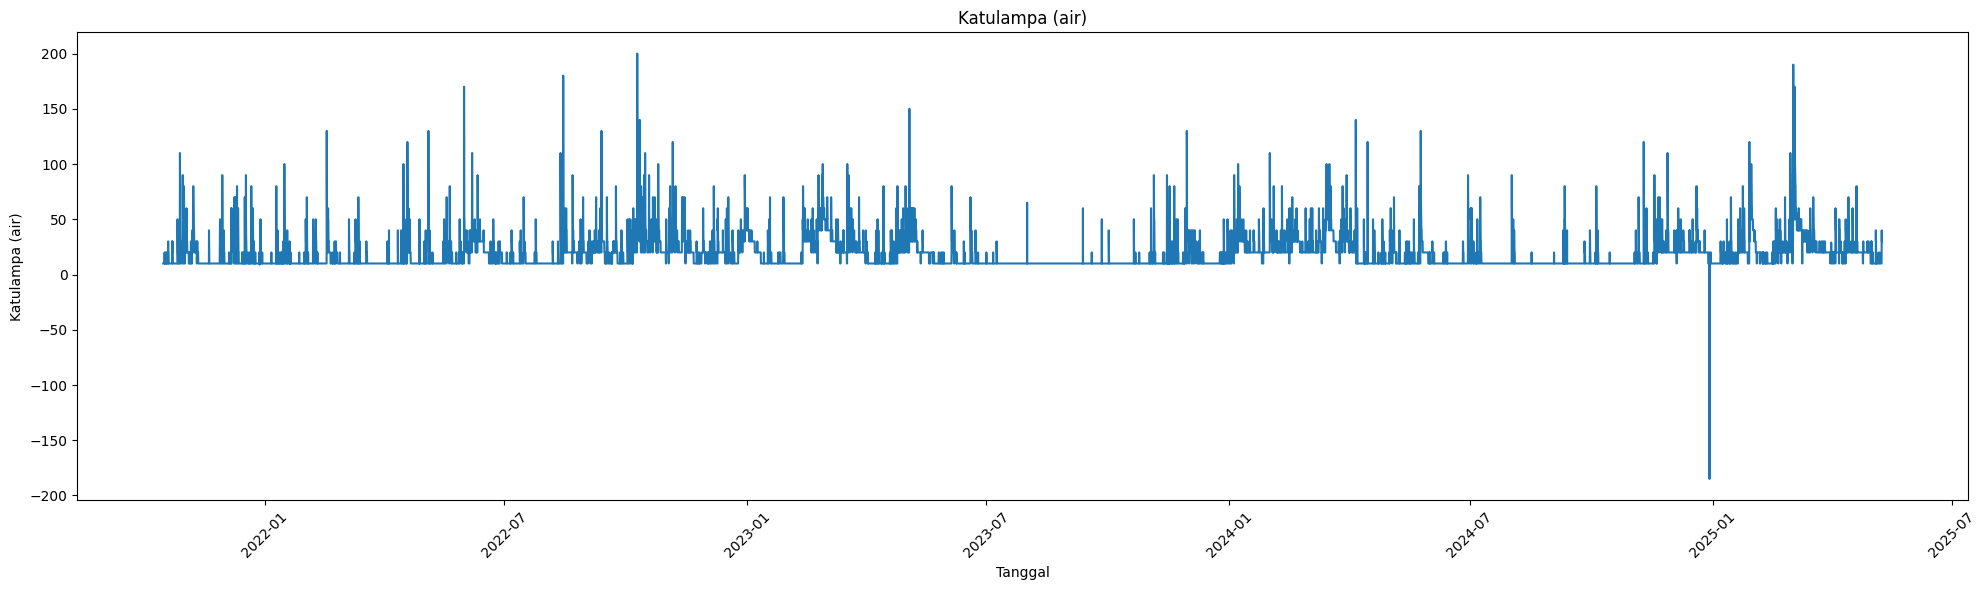

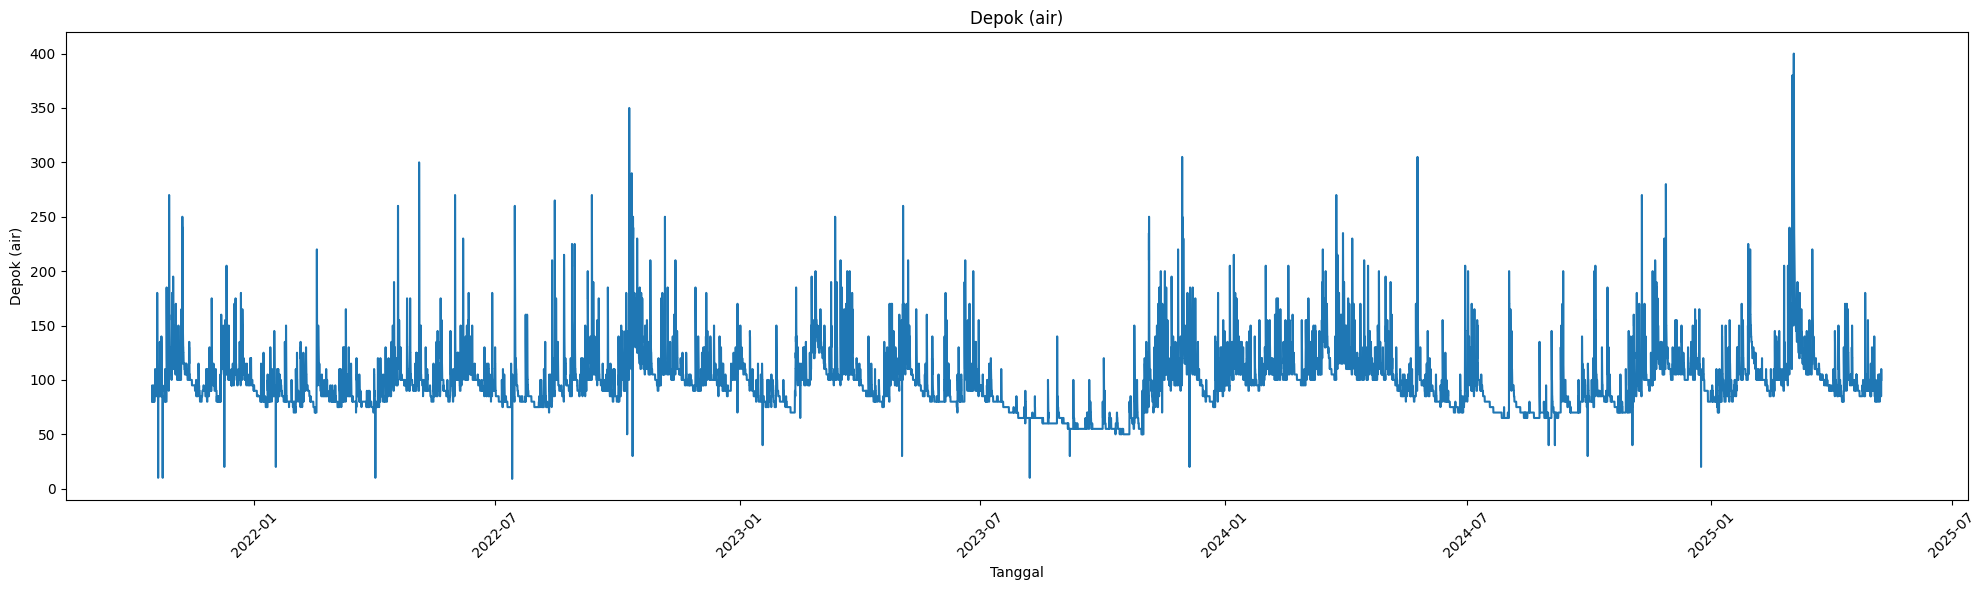

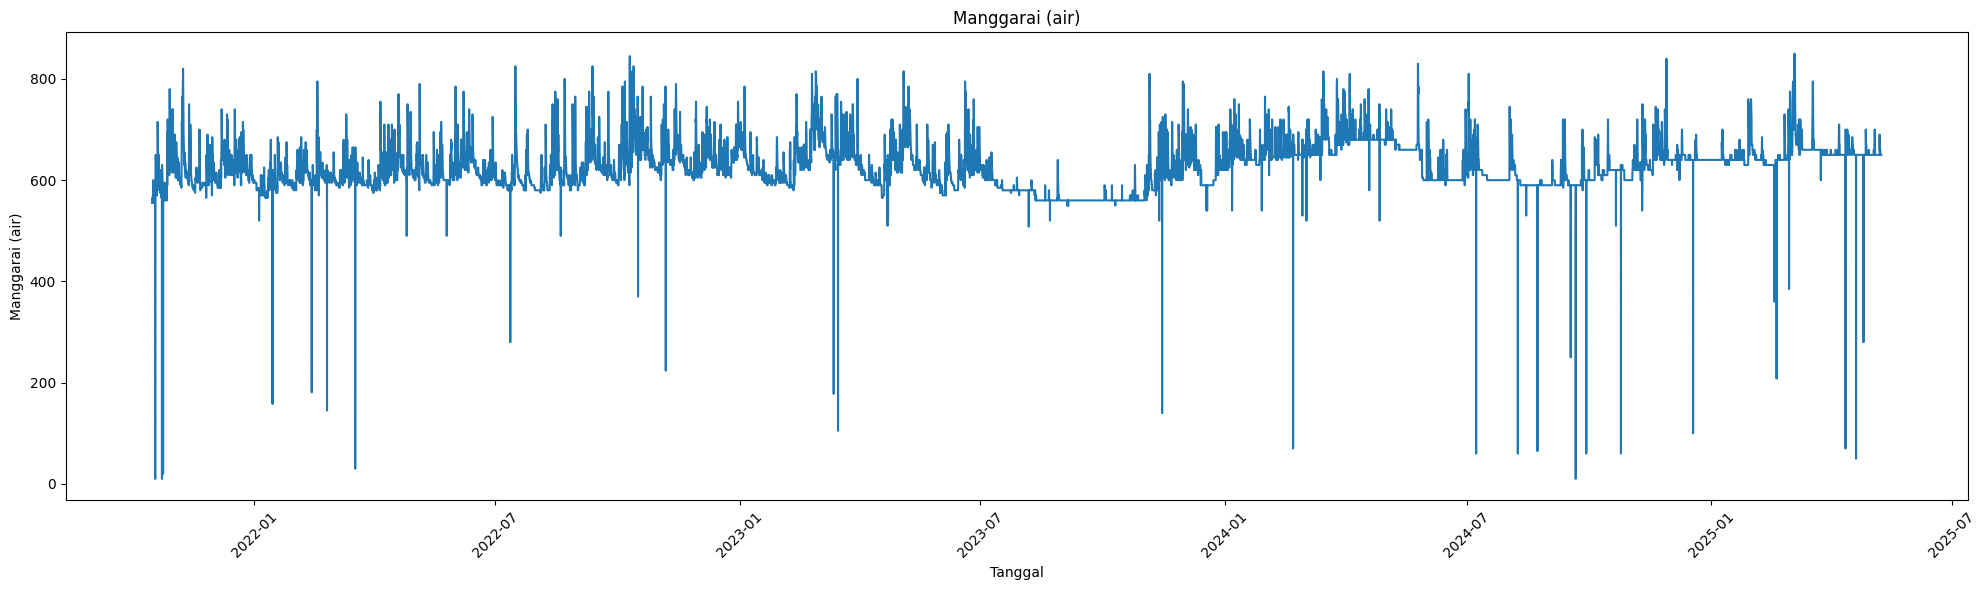

In [42]:
for i in range(len(numeric_columns)):
    ts_plot(df_final, numeric_columns[i])

In [66]:
df_final_cleaned = df_final.copy()

def impute(col, min_val):
    # Get the actual index values instead of using integer positions
    indices = df_final_cleaned.index.tolist()
    
    for i, idx in enumerate(indices):
        if df_final_cleaned.at[idx, col] < min_val:
            if i == 0:
                # First row: use next row's value
                df_final_cleaned.at[idx, col] = df_final_cleaned.at[indices[i + 1], col]
            elif i == len(indices) - 1:  # Fixed: was missing -1
                # Last row: use previous row's value
                df_final_cleaned.at[idx, col] = df_final_cleaned.at[indices[i - 1], col]
            else:
                # Middle rows: use average of adjacent values
                prev_val = df_final_cleaned.at[indices[i - 1], col]
                next_val = df_final_cleaned.at[indices[i + 1], col]
                df_final_cleaned.at[idx, col] = (prev_val + next_val) / 2

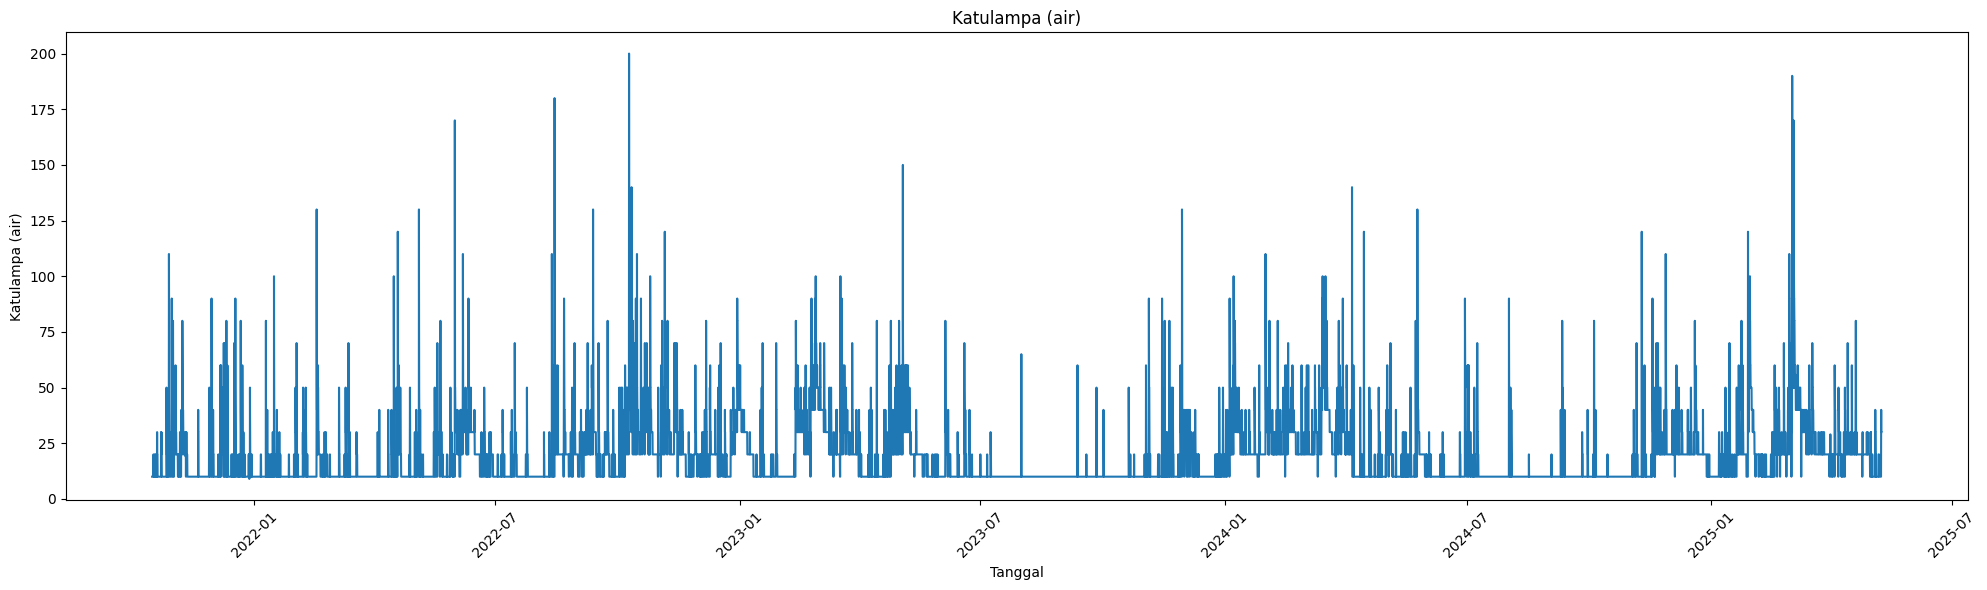

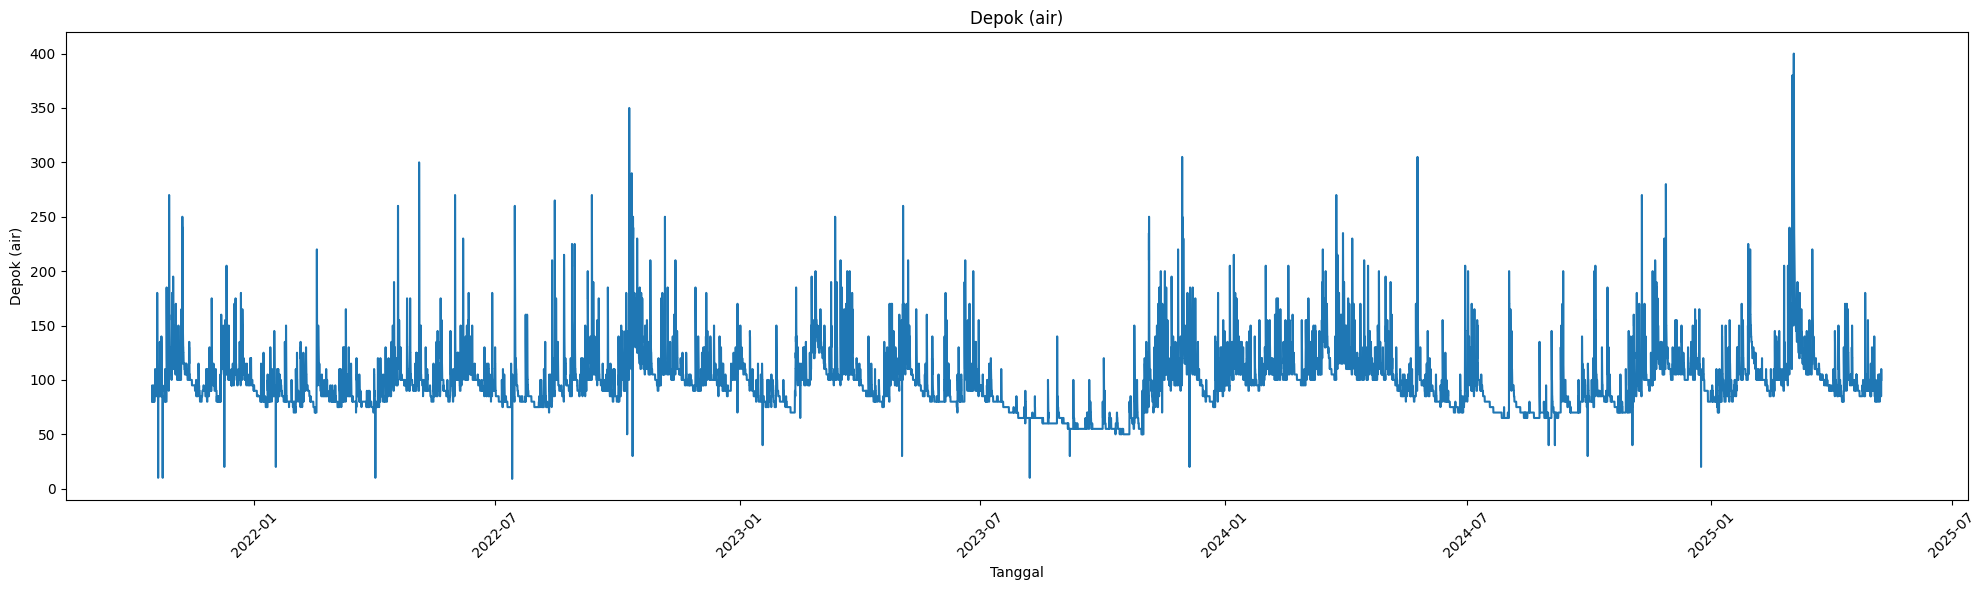

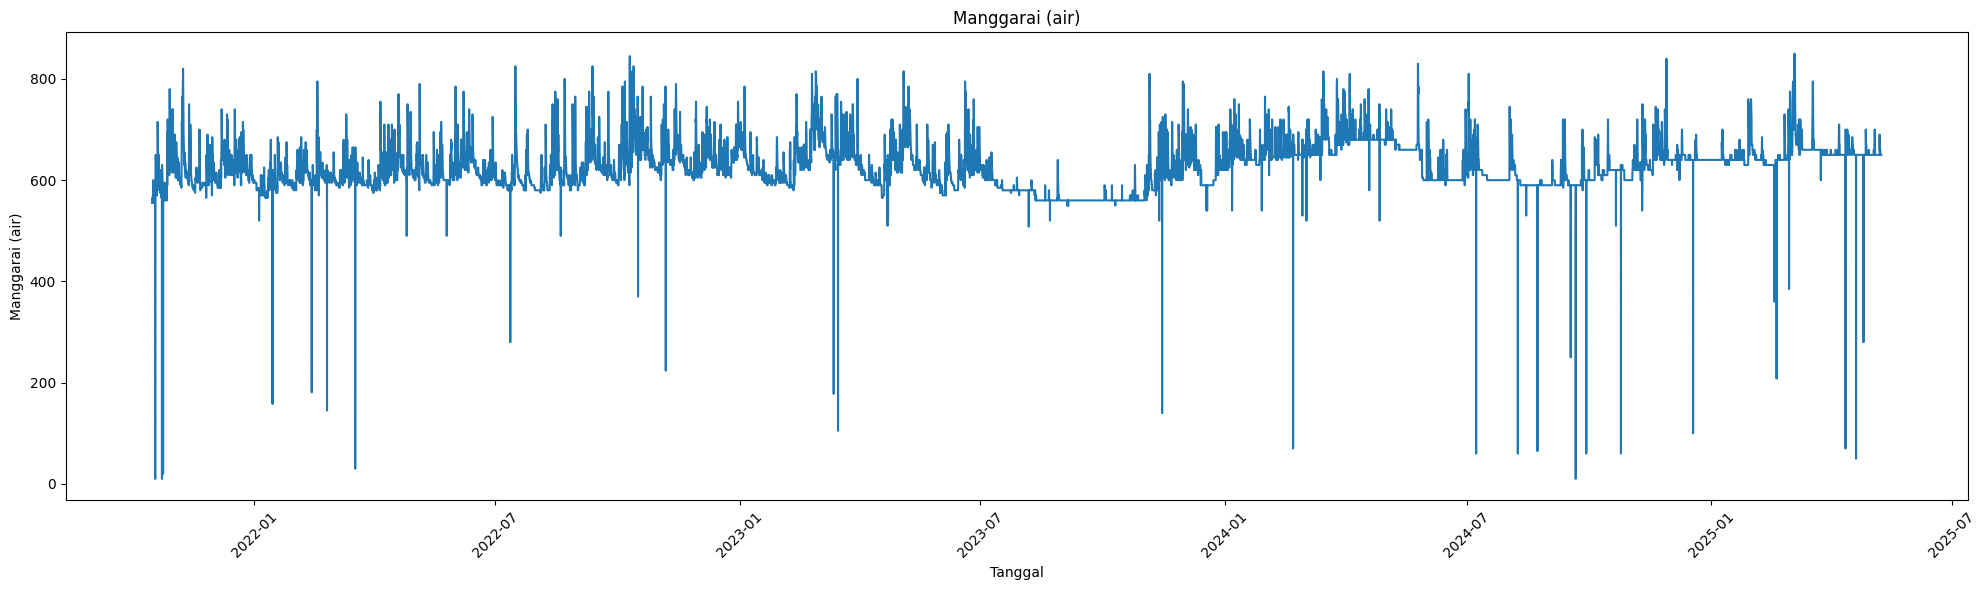

In [67]:
for col in numeric_columns:
    impute(col, 0)
    ts_plot(df_final_cleaned, col)

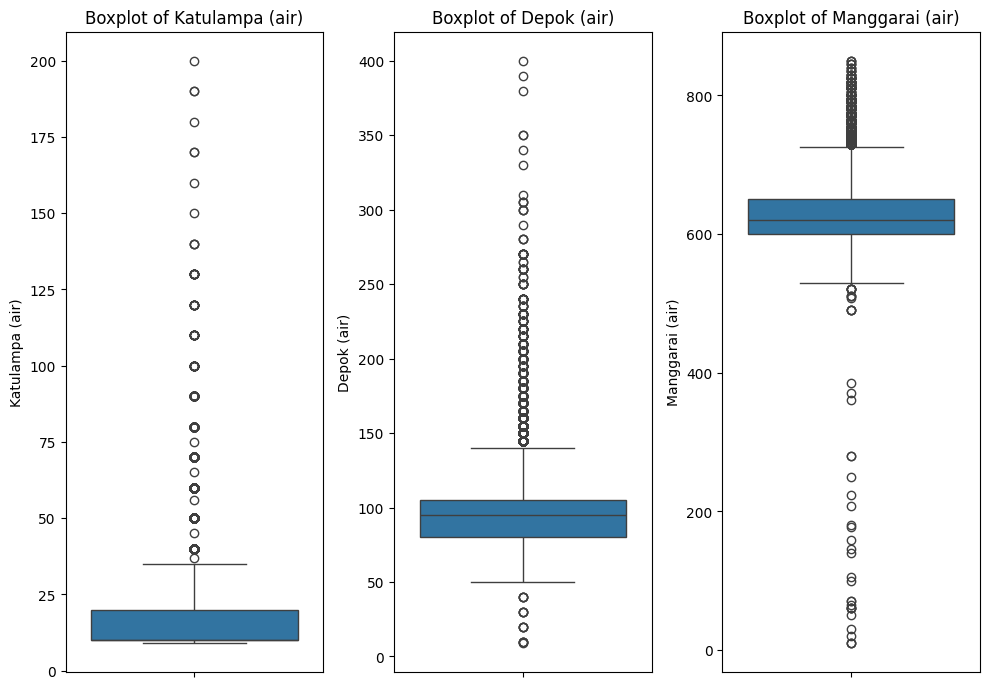

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(10, 7))

# Create boxplots for the 3 numeric columns
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_final_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

In [33]:
df_cleaned.to_csv('02 Hasil Data Cleaning Part 2.csv', index=False)